# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [20]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Pastikan resource nltk sudah di-download
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Inisialisasi Lemmatizer dan Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/marlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/marlee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/marlee/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:


# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /Users/marlee/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [5]:
# Lokasi file dataset (sesuaikan nama file CSV)
dataset_path = "/Users/marlee/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1"

# Jika di dalam folder ada file CSV, kita bisa mencari filenya
for file in os.listdir(dataset_path):
    if file.endswith(".csv"):
        csv_file = os.path.join(dataset_path, file)
        print("Found CSV:", csv_file)

# Membaca CSV menjadi DataFrame
df = pd.read_csv(csv_file)

Found CSV: /Users/marlee/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


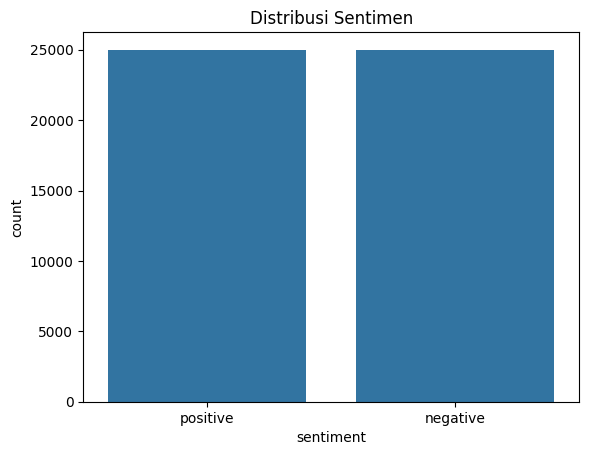

In [11]:
# Hitung jumlah tiap kelas
print(df['sentiment'].value_counts())

# Visualisasi distribusi
sns.countplot(x='sentiment', data=df)
plt.title("Distribusi Sentimen")
plt.show()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


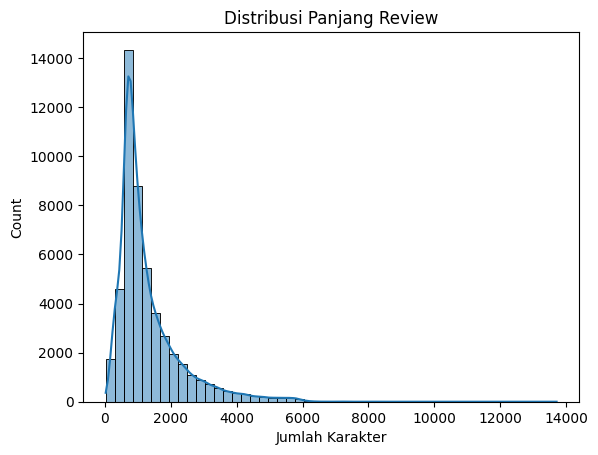

In [12]:
# Tambahkan kolom panjang review
df['review_length'] = df['review'].apply(len)

# Statistik panjang review
print(df['review_length'].describe())

# Visualisasi distribusi panjang review
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribusi Panjang Review")
plt.xlabel("Jumlah Karakter")
plt.show()

In [14]:
# Gabungkan semua review menjadi satu teks
all_text = " ".join(df['review'].tolist())

# Hapus tanda baca dan lowercase
all_text = re.sub(r"[^a-zA-Z\s]", "", all_text).lower()

# Hitung frekuensi kata
words = all_text.split()
word_counts = Counter(words)

# 20 kata paling sering
print(word_counts.most_common(20))

[('the', 663934), ('and', 320704), ('a', 320555), ('of', 288389), ('to', 266782), ('is', 210168), ('in', 184877), ('it', 152920), ('i', 152130), ('this', 149414), ('that', 136093), ('br', 114890), ('was', 95225), ('as', 91236), ('with', 86848), ('for', 86730), ('movie', 83523), ('but', 81781), ('film', 74459), ('on', 66678)]


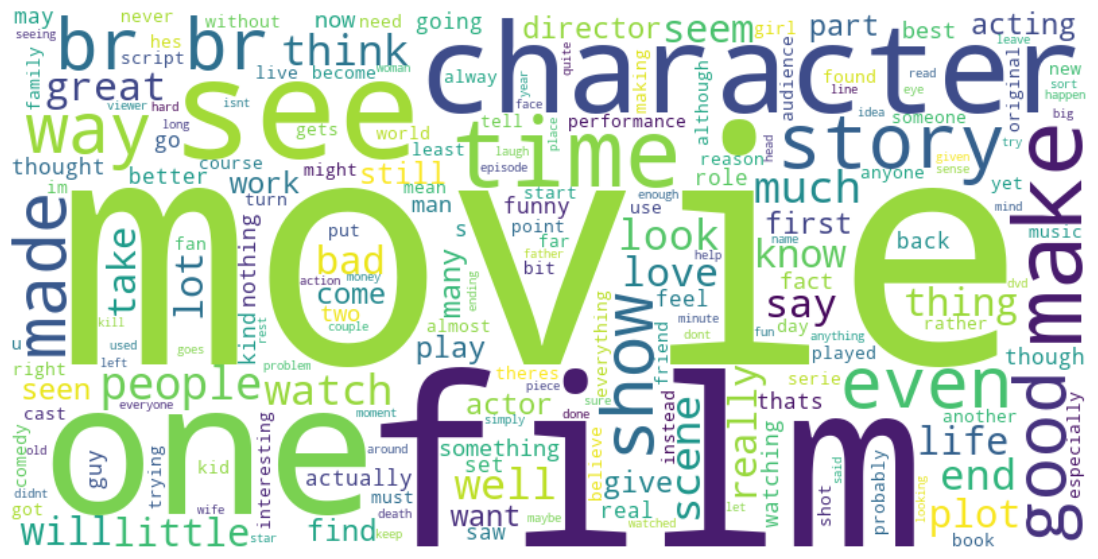

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
df = df.dropna(subset=['review', 'sentiment'])

In [19]:
df = df.drop_duplicates(subset=['review'])

Pembersihan Teks


In [21]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"<.*?>", " ", text)  # hapus HTML tags
    text = text.translate(str.maketrans("", "", string.punctuation))  # hapus tanda baca
    text = re.sub(r"\d+", "", text)  # hapus angka
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

df['clean_review'] = df['review'].apply(clean_text)

Tokenisasi Data

In [22]:
df['tokens'] = df['clean_review'].apply(word_tokenize)

Stopwords dan Lemmatization

In [23]:
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

df['lemmatized'] = df['tokens'].apply(lemmatize_tokens)

Label Encoder

In [24]:
le = LabelEncoder()
df['sentiment_label'] = le.fit_transform(df['sentiment'])

In [25]:
df[['review', 'clean_review', 'lemmatized', 'sentiment', 'sentiment_label']].head()

,review,clean_review,lemmatized,sentiment,sentiment_label
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,"[one, reviewer, mentioned, watching, oz, episo...",positive,1
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn...",positive,1
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...",positive,1
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...,"[basically, there, family, little, boy, jake, ...",negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...,"[petter, matteis, love, time, money, visually,...",positive,1
